## Importing the neccessary libraries.

In [42]:
##Data Manipulation and handeling and visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#nmf
from sklearn.decomposition import NMF

#Clustering Library
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

## Loading the dataset

In [2]:
df = pd.read_csv('spotify.xls' , index_col = 0)

In [3]:
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [4]:
df.shape

(1000, 5000)

In [ ]:
#we have to build recommendation engine using his listening history

In [5]:
x = df.values
x

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

## NMF- no-negative matrix factorisation


In [6]:
nmf = NMF(n_components = 100 , max_iter = 1000, random_state = 3) #n_components = genres in the dataset(features) , max_iter = no of iterations allowed (no of rows)


In [7]:
nmf.fit(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(max_iter=1000, n_components=100, random_state=3)

In [8]:
user_matrix = nmf.transform(x)
song_matrix = nmf.components_.T

In [9]:
user_matrix

array([[1.59597279, 1.63144383, 0.        , ..., 0.        , 0.        ,
        0.08842005],
       [0.        , 1.37058116, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.25150672, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.86093206, ..., 0.        , 2.91063979,
        0.        ],
       [0.89111106, 0.55775866, 5.28815626, ..., 1.14447002, 0.        ,
        0.        ],
       [0.11437224, 0.3810454 , 1.17187612, ..., 0.        , 0.        ,
        0.        ]])

In [10]:
user_matrix.shape

(1000, 100)

In [11]:
song_matrix.shape


(5000, 100)

## Steps for building a recommendation system - Type 1 (for local library or small dataset ) 

1. Consider Recommending songs to the first user (row location zero in user matrix)
2. Find the euclidean distance between this first user and the remaining 999 users.
3. Find out top 10 songs heard by nearest 5 users.
4. Recommend this 10 songs to the first users.


Calculating the distance between two users

In [12]:
#So here we will see how to calculate distance between two users
def col_dist(u1,u2):
    return pow(sum(pow(u1[x] - u2[x], 2) for x in range(len(u1))), 0.5)
#here u(x1-x2)^2 - we have taken the distance and taken the square, 
#basically here we will iterate all the values in u1, and then for every user we have genre or preference (we will have 100 element in u1 and we will find distance between 100 users)

In [13]:
col_dist(user_matrix[0], user_matrix[1]) #using user matrix 0 i am extracting the first usr and user matrix 1 is 1st user preference,

#what will happen if distance is less ?

17.066386600371928

In [14]:
def distance_from_remaining_users(buser, user_matrix): #B USER- base user (means from which we are going to find the distance with remaining 999 users)
    dist = [] 
    for i in range(len(user_matrix)):
        if buser != i:#if my base user =i then i am going to calculate the distance because if we find the distance between same users then it will be obviously same right, that mean we are not going to recommend that song which the particular user is hearing 
            dist.append(col_dist(user_matrix[buser], user_matrix[i]))
    return dist

In [15]:
#now we will store the distances 
dist_user1 = distance_from_remaining_users(0 , user_matrix) 

In [16]:
dist_user1
#len(dist_user)

[17.066386600371928,
 15.356075620685093,
 15.860626597220833,
 15.0854780384622,
 13.844410784062013,
 14.938304994509092,
 13.250608545970184,
 16.848370113786466,
 15.146562760132252,
 15.085160715715936,
 15.42611394735026,
 15.162198319370749,
 8.915369316489127,
 16.067019685715092,
 14.192876182521927,
 12.163103729972029,
 15.342023558150919,
 15.107063798249785,
 12.398262626272693,
 13.014577303418058,
 15.55835100808391,
 15.60633352998937,
 16.157732435950017,
 16.372436321883217,
 15.742562230797144,
 15.287379334888872,
 14.67893233165558,
 13.958180489078563,
 16.3537686288776,
 16.16795046327759,
 15.592805869213214,
 15.300255567303116,
 14.813458276242203,
 14.672279075849522,
 14.9663275265943,
 14.957592291190032,
 15.289917563396669,
 15.75105210041791,
 15.536270215086644,
 13.989176491859912,
 15.584294899339802,
 14.422344102764434,
 14.029914555145101,
 14.498613243929581,
 15.124960994546477,
 14.030779564033235,
 12.413550519932222,
 14.918957038104496,
 13.4

In [ ]:
#how we will get to know which distance from user 0??

## Finding nearest 5 users

In [17]:
nearest_users = np.argsort(dist_user1)[:5]

In [18]:
for i in range (len(nearest_users)):
    nearest_users[i]+=1
nearest_users

array([ 13, 614, 666, 914, 395], dtype=int64)

Finding the most heard songs by these users

In [19]:
for i in nearest_users:
    print('songs heard by user' , i , 'are :')
    temp = df.iloc[i]
    print(temp[temp.values != 0].index)
        
    #Songs heard by nearest 5 users,we have only picked up the songs which was heard by them atleast on time

songs heard by user 13 are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_13',
       ...
       'song_4989', 'song_4990', 'song_4991', 'song_4992', 'song_4993',
       'song_4994', 'song_4995', 'song_4997', 'song_4998', 'song_5000'],
      dtype='object', length=4687)
songs heard by user 614 are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4686)
songs heard by user 666 are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', lengt

picking out top 10 songs from above list of songs

In [20]:
def topNsongs(nearest_users , df , N):
    temp = df.iloc[nearest_users]
    dict1 = temp.max().to_dict()
    #print(dict1)
    
    #converting every key value pair into a tuple and swapping them for sorting purpose, end result is a list of
    # song and number of times heard tuple 
    
    sorted_dict = sorted(dict1.items(), key = lambda keyvalue: (keyvalue[1] , keyvalue[0]) , reverse = True)[:N]
    #Initially my dictionary was like this{song 1:12, song2:5, song3:8}, after swapping it became like this and then i can easily sort that dictionary because now i have numbers in it
    #print(sorted_dict)
    return [x[0] for x in sorted_dict]
    #return 0
    
    
    
    

In [21]:
topNsongs(nearest_users , df , 15)

['song_998',
 'song_990',
 'song_99',
 'song_988',
 'song_987',
 'song_986',
 'song_985',
 'song_982',
 'song_979',
 'song_968',
 'song_96',
 'song_958',
 'song_951',
 'song_95',
 'song_949']

## Type 2 Recommendation System for Larger Datasets
- K-means Clustering 

In [23]:
#to decide value of k which method do we use?  elbow method- x-axis - value of k y axis we have - wcss
#What do we use to detect value of k in KNN?? - 
#wcss within cluster sum of squares
#import package
WCSS = {}
for k in range(1,50):
    kmeans = KMeans(n_clusters = k , max_iter = 1000).fit(song_matrix)
    WCSS[k] = kmeans.inertia_
    

In [24]:
WCSS

{1: 14072.226800905315,
 2: 13901.168368853396,
 3: 13774.072470663405,
 4: 13672.67930739917,
 5: 13592.640014372104,
 6: 13524.942406334721,
 7: 13456.180867468456,
 8: 13400.90693646582,
 9: 13356.680618523513,
 10: 13308.582905770929,
 11: 13263.325506613668,
 12: 13227.004132899898,
 13: 13200.146688110439,
 14: 13169.681751171536,
 15: 13151.441409957177,
 16: 13123.65297211733,
 17: 13102.530853662534,
 18: 13079.35882599355,
 19: 13057.01600960709,
 20: 13029.654682498323,
 21: 13018.593187035342,
 22: 12995.482215286176,
 23: 12988.65578683475,
 24: 12970.591883917461,
 25: 12948.67976281463,
 26: 12929.832692822964,
 27: 12928.209832492848,
 28: 12900.232676385258,
 29: 12887.376721129183,
 30: 12873.697700422472,
 31: 12873.589450908545,
 32: 12852.382899729117,
 33: 12831.404366618732,
 34: 12814.340121592948,
 35: 12818.925961389514,
 36: 12806.943391608385,
 37: 12790.523051626362,
 38: 12765.099250574474,
 39: 12755.298716607891,
 40: 12754.790314434866,
 41: 12748.55727

Text(0, 0.5, 'WCSS')

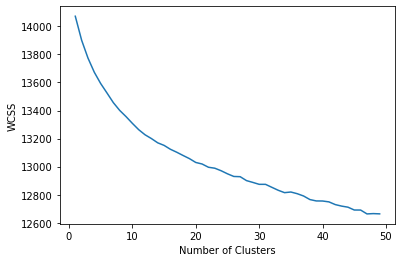

In [27]:
plt.plot(WCSS.keys() , WCSS.values())
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [53]:
def songs_in_cluster(N_clusters , df , song_matrix , song_name , n_recommendations):
    kmeans = KMeans(n_clusters = N_clusters , max_iter = 1000).fit(song_matrix)
    index_in_song = df.columns.to_list().index(song_name)
    #print(index_in_song)
    song_vector = song_matrix[index_in_song] #song_vector = genre score of given song
    #print(song_vector)
    all_songs_in_cluster = kmeans.predict(song_matrix)
    #print(len(all_songs_in_cluster))
    
    #Finding Songs which belongs to same cluster as of songs passed in song name
    songs_in_selected_cluster = [x for x  in range(len(all_songs_in_cluster)) 
                                 if all_songs_in_cluster[x] == kmeans.predict([song_vector])]
    #print(len(songs_in_selected_cluster))
    song_cluster = song_matrix[songs_in_selected_cluster]
    
    #print(song_cluster)
    neighbors = NearestNeighbors(n_neighbors = n_recommendations)
    neighbors.fit(song_cluster)
    recommended_songs = neighbors.kneighbors([song_matrix[index_in_song]])
    #print(recommended_songs[1][0])
    
    songs = df.columns
    return [songs[x] for x in recommended_songs[1][0]]  

In [54]:
songs_in_cluster(15 , df , song_matrix , 'song_5' , 5)

['song_2', 'song_192', 'song_253', 'song_137', 'song_49']